In [1]:
from time import time
start = time()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import numpy as np

### Standard deviation and Chebyshev teorem

This teorem is talking about the ability to retrieve N percentage of your data based only in the standard deviation (std o $\sigma$). For instance, if we get the mean of our data and add (or substract) the $N\sigma$ (where $N$ is either 1,2 o 3), we will be able to retrieve the ~68%, ~95% and ~99% of our data respectively

In [3]:
plt.style.use("seaborn")
np.random.seed(10)

In [4]:
iris_df = sns.load_dataset("iris")
#iris_df = iris_df.rename(iris_df["species"], axis=0)
#iris_df.drop("species", axis=1, inplace=True)

In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# ~68% de valores recuperados dentro de +1std;-1std a partir de la media
# ~95% de valores recuperados dentro de +2std,-2std a partir de la media
# ~99$ de valores recuperados dentro de +3std,-3std a partir de la media

sepal_length_std = iris_df["sepal_length"].std()
sepal_length_mean= iris_df["sepal_length"].mean()

std_1_mask = (iris_df.sepal_length < sepal_length_mean + sepal_length_std) & (iris_df.sepal_length > sepal_length_mean - sepal_length_std)
std_2_mask = (iris_df.sepal_length < sepal_length_mean + 2*sepal_length_std) & (iris_df.sepal_length > sepal_length_mean - 2*sepal_length_std)
std_3_mask = (iris_df.sepal_length < sepal_length_mean + 3*sepal_length_std) & (iris_df.sepal_length > sepal_length_mean - 3*sepal_length_std)

In [7]:
std_1 = iris_df[std_1_mask].sepal_length.shape[0] / iris_df.shape[0]
std_2 = iris_df[std_2_mask].sepal_length.shape[0] / iris_df.shape[0]
std_3 = iris_df[std_3_mask].sepal_length.shape[0] / iris_df.shape[0]

In [8]:
print(f"Percentage of recovery using 1std (plus/minus): {std_1}")
print(f"Percentage of recovery using 2std (plus/minus): {std_2}")
print(f"Percentage of recovery using 3std (plus/minus): {std_3}")

Percentage of recovery using 1std (plus/minus): 0.6
Percentage of recovery using 2std (plus/minus): 0.96
Percentage of recovery using 3std (plus/minus): 1.0


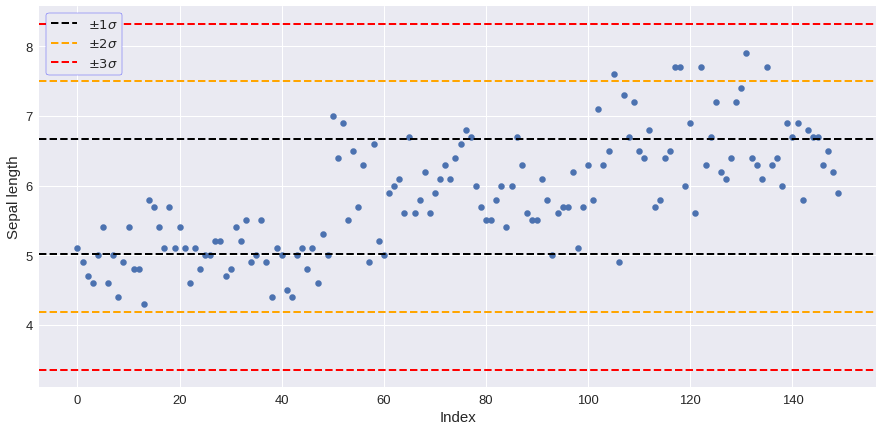

In [9]:
# Seems right the recovery rate using te std

iris_df.sepal_length.sort_values().reset_index().plot.scatter(x="index", y="sepal_length", figsize=(15,7), linewidth=2)

for s,c in zip(range(1,4), ["black","orange","red"]):
    
    plt.axhline(sepal_length_mean + s * sepal_length_std, color=c, linestyle="--", label=f"$\pm{s}\sigma$", linewidth=2)
    plt.axhline(sepal_length_mean - s * sepal_length_std, color=c, linestyle="--", linewidth=2)

plt.xlabel("Index", fontsize = 15)
plt.ylabel("Sepal length", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
legend = plt.legend(loc="upper left", fontsize=13, frameon=True)
legend.get_frame().set_edgecolor("blue")
legend.get_frame().set_alpha(None)
plt.show()

In [10]:
# ¿Lo anterior aplica para todos los valores?

def TestChebyshevTeorem(Series:pd.Series, right_left_std:list):
    
        '''
        
        Test Chebyshev Teorem 
        
        Test Chebyshev Teorem about aprox 68% of values in a set can be retrieved using plus/minus 1 std,
        plus/minus 2 std retrieves aprox 95% and plus/minus 3 std about 99%
        
        Paramaters
        ----------
        
        Series: pd.Series
            Series containing values of the set to test
        
        right_left_std: list([[],[],[]]), [[],[],[]]
            List of list containing three list. Each one describing two values: mean plus/minus 1std,
            mean plus/minus 2std, mean plus/minus 3std
            
        Examples
        --------
        
        >>> S = pd.Series([1,2,3,4,5])
        >>> mu = S.mean()
        >>> sigma = S.std()
        >>> std_1 = [mu + sigma, mu - sigma]
        >>> std_2 = [mu + 2 * sigma, mu - 2 * sigma]
        >>> std_3 = [mu + 3 * sigma, mu - 3 * sigma]
        >>> TestChebyshevTeorem(Series=S, right_left_std=[std_1, std_2, std_2])
        Percentage of recovery using 1std (plus/minus): 0.6
        Percentage of recovery using 2std (plus/minus): 1.0
        Percentage of recovery using 3std (plus/minus): 1.0
        
        '''
        
        right_left_1 = right_left_std[0]
        right_left_2 = right_left_std[1]
        right_left_3 = right_left_std[2]
        
        # Filter right and left values from the mean using N * std
        std_1_mask = (Series < right_left_1[0]) & (Series > right_left_1[1])
        std_2_mask = (Series < right_left_2[0]) & (Series > right_left_2[1])
        std_3_mask = (Series < right_left_3[0]) & (Series > right_left_3[1])
        
        std_1 = Series[std_1_mask].shape[0] / Series.shape[0]
        std_2 = Series[std_2_mask].shape[0] / Series.shape[0]
        std_3 = Series[std_3_mask].shape[0] / Series.shape[0]
    
        print(f"Percentage of recovery using 1std (plus/minus): {std_1}")
        print(f"Percentage of recovery using 2std (plus/minus): {std_2}")
        print(f"Percentage of recovery using 3std (plus/minus): {std_3}")

def RetrieveRightLeftStd(Series:pd.Series, TestCheby=True) -> [[float, float],[float, float],[float, float]]:
    
    '''
    
    Retrieve the value limits after aplying mean plus/minus N std, where N is either 1,2,3
    
    Retrieve the values limits and return a list of list of len(list)=3 and len(list[0])=2. Each value inside is
    a list with the right and left limits based on the mean plus/minus N * standard_deviation where N=[1,2,3] 
    
    Parameters
    ----------
    
    Series: pd.Series
        Pandas Series with methods mean and std
        
    Examples
    --------
    
    >>> S = pd.Series([1,2,3,4])
    >>> RetrieveRightLeftStd(S, TestCheby=False)
    [[3.7909944487358054, 1.2090055512641944],
     [5.081988897471611, -0.0819888974716112],
     [6.372983346207417, -1.372983346207417]]
    
    '''
    
    # Retrieve std and mean per set
    sigma = Series.std()
    mu = Series.mean()
    
    # Retrieve value of N * std to the right and left of the mean
    right_left_1 = [mu + sigma, mu - sigma]
    right_left_2 = [mu + 2 * sigma, mu - 2 * sigma]
    right_left_3 = [mu + 3 * sigma, mu - 3 * sigma]
    
    # Test Chebyshev Teorem
    
    if TestCheby:
        TestChebyshevTeorem(Series, [right_left_1, right_left_2, right_left_3])
    
    return [right_left_1, right_left_2, right_left_3]

In [11]:
# Test for every numeric column in our iris DataFrame the Chebyshev teorem and save the right and left
# std to plot later

Limits_iris_std = dict()
for key in iris_df.iloc[:,0:4]:
    
    print(f"Using column {key}")
    Limits_iris_std[key] = RetrieveRightLeftStd(Series=iris_df[key])
    print("")

Using column sepal_length
Percentage of recovery using 1std (plus/minus): 0.6
Percentage of recovery using 2std (plus/minus): 0.96
Percentage of recovery using 3std (plus/minus): 1.0

Using column sepal_width
Percentage of recovery using 1std (plus/minus): 0.6733333333333333
Percentage of recovery using 2std (plus/minus): 0.9666666666666667
Percentage of recovery using 3std (plus/minus): 0.9933333333333333

Using column petal_length
Percentage of recovery using 1std (plus/minus): 0.5
Percentage of recovery using 2std (plus/minus): 1.0
Percentage of recovery using 3std (plus/minus): 1.0

Using column petal_width
Percentage of recovery using 1std (plus/minus): 0.4866666666666667
Percentage of recovery using 2std (plus/minus): 1.0
Percentage of recovery using 3std (plus/minus): 1.0



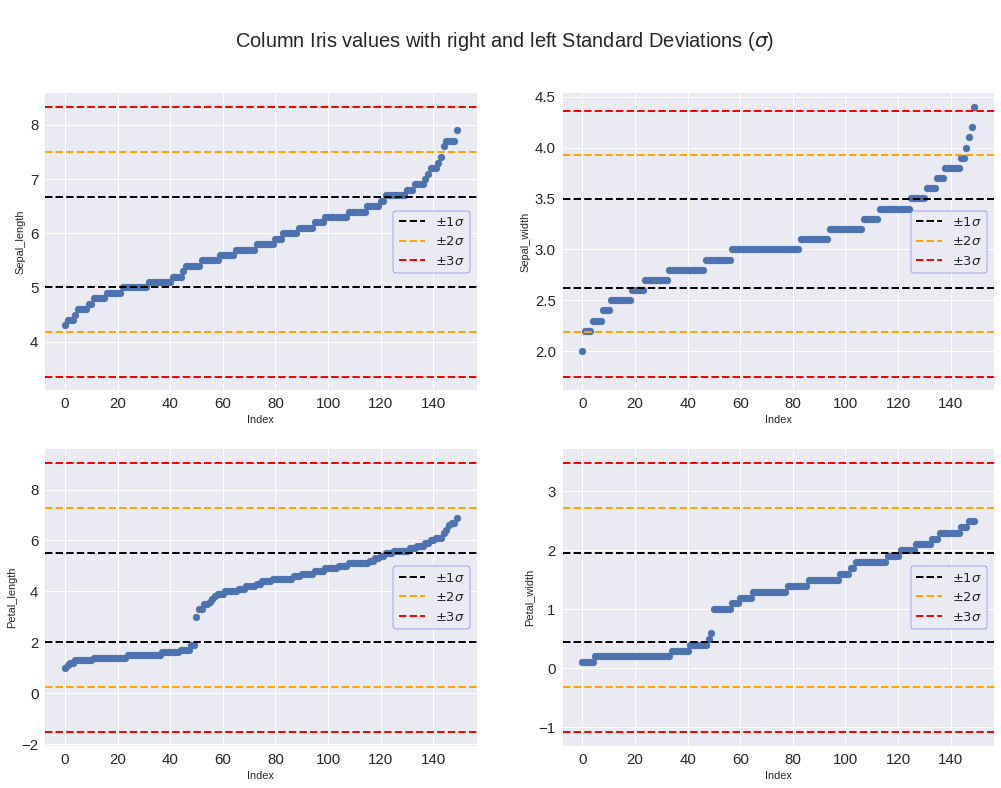

In [12]:
# Plotting values with std limits
fig = plt.figure(figsize=(17,12))

for i, key in enumerate(iris_df.iloc[:, 0:4], start=1):

    copy_df = iris_df[key].sort_values().reset_index()
    plt.subplot(2,2,i)
    plt.scatter(y=copy_df[key], x=copy_df.index)
    
    for j,c,std in zip([1,2,3], ["black","orange","red"], Limits_iris_std[key]):
        plt.axhline(std[0], color=c, linestyle="--", label=f"$\pm{j}\sigma$", linewidth=2)
        plt.axhline(std[1], color=c, linestyle="--", linewidth=2)
    
    
    plt.ylabel(key.capitalize())
    plt.xlabel("Index")
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    legend = plt.legend(loc="best", fontsize=13, frameon=True).get_frame()
    legend.set_alpha(None)
    legend.set_edgecolor("blue")

plt.suptitle("\nColumn Iris values with right and left Standard Deviations ($\sigma$)", fontsize=20)
plt.show()

### Z-score-Standarization and probability distribution function

Z-score is a measurement of how far we are from the $\mu$ in terms of standard deviations. Using a Z-score makes possible to scale a set of values to have $\sigma=1$ y $\mu=0$ and It's useful to get the probabilities of our data (to any $\sigma$ and $\mu$ values whenever our data is normally distributed). In fact, there is a table with all the probabilities already determined for Z-score values which is available online

Z-score is calculated as:

$$
Zscore = \frac{x - \mu}{\sigma}
$$

On the other hand, three differente probabilty functions are used to measure continous and discrete probabilities of variables. The third one serves to describe the cumulutive probability of a range of events

* Measuring probabilities in discrete variables, the _probability mass function_ __(PMF)__ is useful
* Measuring probabilities in continue variables, the _probability density function_ __(PDF)__ will be your ally
* Measuring probabilities for a range of cases (events), the _cumulative distribution function_ __(CDF)__ is a must

Obtaining the CDF from PMF is the sum of all PMF cases. That's is not exactly the same when calculating the CDF from continue variables (PDF), in this case, the CDF is going to be the integral of our distribution function.

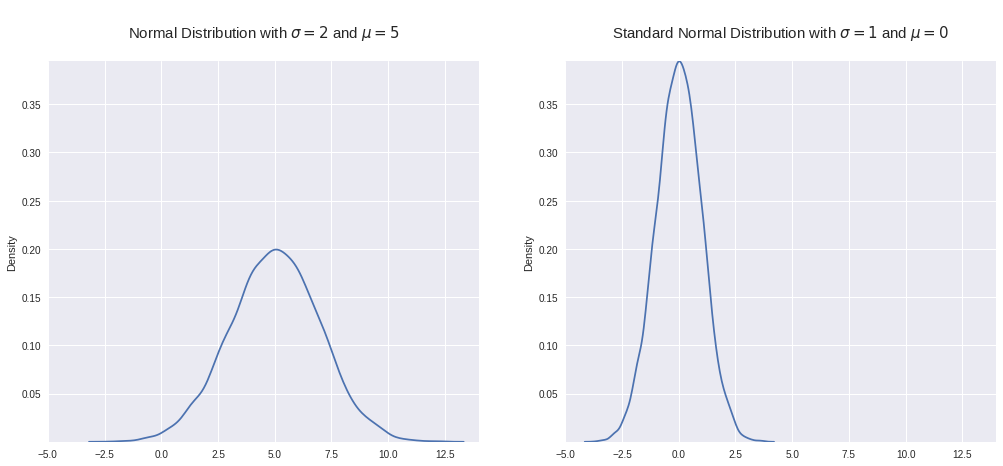

In [13]:
# Getting data normally distributed, mean=5 and std=2, examples = 10000
mean = 5
std = 2
examples = 10000
normal = np.random.normal(mean, std, examples)

# Getting data of standard normal distribution
normal_scaled = (normal - normal.mean()) / normal.std()

# Plot normal distribution and standard normal distribution 

fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(17,7))
sns.kdeplot(normal, ax=ax_1)
ax_1.set_title(f"\nNormal Distribution with $\sigma={std}$ and $\mu={mean}$\n", fontdict={"size":15})

sns.kdeplot(normal_scaled, ax=ax_2)
ax_2.set_title("\nStandard Normal Distribution with $\sigma=1$ and $\mu=0$\n", fontdict={"size":15})

# Setting x and y limits of the plots
# X axis
x_limit_ax1 = ax_1.xaxis.get_data_interval()
x_limit_ax1 = [np.floor(x_limit_ax1[0]), np.ceil(x_limit_ax1[1])]

x_limit_ax2 = ax_2.xaxis.get_data_interval()
x_limit_ax2 = [np.floor(x_limit_ax2[0]), np.ceil(x_limit_ax2[1])]

ax_1.set_xlim([min([x_limit_ax1[0], x_limit_ax2[0]]), max([x_limit_ax1[1], x_limit_ax2[1]])])
ax_2.set_xlim([min([x_limit_ax1[0], x_limit_ax2[0]]), max([x_limit_ax1[1], x_limit_ax2[1]])])

# Y axis
y_limit_ax1 = ax_1.yaxis.get_data_interval()
y_limit_ax2 = ax_2.yaxis.get_data_interval()

ax_1.set_ylim([min([y_limit_ax1[0], y_limit_ax2[0]]), max([y_limit_ax1[1], y_limit_ax2[1]])])
ax_2.set_ylim([min([y_limit_ax1[0], y_limit_ax2[0]]), max([y_limit_ax1[1], y_limit_ax2[1]])])

plt.show()

In [14]:
# Escaling using StandardScaler It's the same as Zscore, but StandardScaler is the sciklearn implementation

Scaler = StandardScaler()
normal_scaled_sklearn = Scaler.fit_transform(normal.reshape(-1,1))

# Comparing zscore manual implementation versus StandardScaler
(normal_scaled.reshape(-1,1) == normal_scaled_sklearn.reshape(-1,1)).all()

True

In [15]:
# Normal distribution is a continue distribution. Let's obtain the CDF and PDF of values chosen randomly

Random_choice_normal = np.random.choice(normal_scaled)
Normal_PDF = stats.norm.pdf(Random_choice_normal) 
Normal_CDF = stats.norm.cdf(Random_choice_normal)

print(f"Random Z-score picked: {Random_choice_normal}")
print(f"Probability density function: {Normal_PDF}")
print(f"Cumulative distribution function: {Normal_CDF}")

Random Z-score picked: 1.0863537561402714
Probability density function: 0.22112640449260748
Cumulative distribution function: 0.8613387437320082


In [16]:
# Let's plot the random value picked, the PDF and the CDF, but first,
# let's define a python function to integrate and get the
# CDF plot, This integral is going to calculate rectangle areas

def IntegralRecatangles(X:np.array, Y:np.array, left:bool = True) -> (list, list):
    
    '''
    Integrate using rectangle method
    
    Integrate using rectangle method and return an X axis (current X point
    value plus the following X point value divided by 2) and Y axis (cumulative sum)
    
    Parameters
    ----------
    
    X: np.array
        Array of x values sorted
    
    Y: np.array
        Array of f(x) values sorted
    
    left: bool
        Bool to indicate if the reference height value of the rectangle 
        is taken from the right X point (X[i] - X[i - 1], Y[i]) or
        left X point(X[i] - X[i - 1], Y[i - 1])
    
    Examples
    --------
    
    >>> X = np.array([1,2,3,4]).reshape(-1, 1)
    >>> Y = np.array([1,2,3,4]).reshape(-1, 1)
    >>> IntegralRecatangles(X, Y)
    ([1,1,1],[3,6,10])
    
    '''
    
    assert len(X) == len(Y), f"Not matched shapes of {len(X)} and {len(Y)}"
    
    # Take the height of the first X point or the second
    left = 1 if left else 0
    
    # Defining the X axis to return and the cumsum (area under the curve and Y axis)
    base_array, cumsum = [], [0]
    
    for i in range(1, len(X)):
        
        base = X[i] - X[i - 1]
        height = Y[i - left]
        
        base_array.append((X[i] + X[i - 1]) / 2)
        cumsum.append(cumsum[-1] + (base * height))

    return (base_array, cumsum[1:])

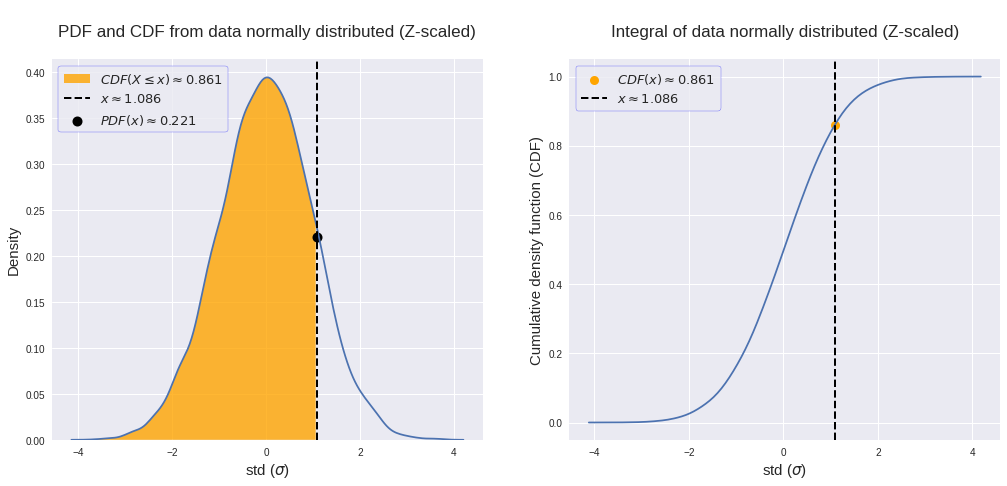

In [17]:
# Plotting
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(17, 7))

# Defining first plot
sns.kdeplot(normal_scaled, ax=ax_1)

# Getting values to fill under curve and cumulative sum
curve_values = ax_1.get_lines()[0].get_data()
mask = curve_values[0] <= Random_choice_normal
fill_x, fill_y = curve_values[0][mask], curve_values[1][mask]

# Filling area under curve, ploting random value picked and PDF
ax_1.fill_between(fill_x, fill_y, alpha=0.8, facecolor="orange",
                  label=fr"$CDF(X \leq x) \approx {round(Normal_CDF, 3)}$")

ax_1.axvline(Random_choice_normal, linestyle="--", c="black",
             label=fr"$x \approx {round(Random_choice_normal,3)}$", linewidth=2)

ax_1.scatter(Random_choice_normal, Normal_PDF, color="black",
             label=fr"$PDF(x) \approx {round(Normal_PDF,3)}$", linewidth=3)

# Setting a title and axis labels
ax_1.set_title("\nPDF and CDF from data normally distributed (Z-scaled)\n", fontdict={"size":17})
ax_1.set_xlabel("std ($\sigma$)", fontdict={"size":15})
ax_1.set_ylabel("Density", fontdict={"size":15})
ax_1.legend(fontsize=13, frameon=True).get_frame().set_edgecolor("blue")

# Defining second plot about cumulative function
# Getting integral values for this second plot
X,Y = IntegralRecatangles(curve_values[0], curve_values[1])

ax_2.plot(X, Y)

ax_2.scatter(Random_choice_normal, Normal_CDF, c="orange",
             label=fr"$CDF(x) \approx {round(Normal_CDF, 3)}$", linewidths=2)
ax_2.axvline(Random_choice_normal, linestyle="--", c="black", 
             label=fr"$x \approx {round(Random_choice_normal,3)}$", linewidth=2)

# Setting a title and axis labels
ax_2.set_title("\nIntegral of data normally distributed (Z-scaled)\n", fontdict={"size":17})
ax_2.set_ylabel("Cumulative density function (CDF)", fontdict={"size":15})
ax_2.set_xlabel("std ($\sigma$)", fontdict={"size":15})
ax_2.legend(fontsize=13, frameon=True).get_frame().set_edgecolor("blue")

plt.show()

### Quartiles, IQR or Interquartile Range and BoxPlot

A quartile is a type of quantile which divides the number of data points sorted into 4 parts, o quarters. In the same way a quartile splits the data into 4, others metrics can be found as decil, which divides the data into 10 parts, or the percentiles, dividing into 100 parts (percentage), but the most popular/used is the quartile.

For example, lets supose the set $X = \{1,2,3,4,5,6,7,8,9,10,11\}$, here, the values dividing into 4 parts our dataset are the numbers 3,6,9, each one is called Q1, Q2 and Q3 respectively (Note the Q2 is the same as the median). Making this split we will get 4 sets of the same size excluding the Q values.

$$x_1 = \{1,2\}$$
$$x_2 = \{4,5\}$$
$$x_3 = \{7,8\}$$
$$x_4 = \{10,11\}$$

On the other hand, the Interquartile Range or also known as IQR, it's a measurement of dispersion calculated as the difference between Q3 and Q1. IQR is useful to detect outliers based on the rule:

$$left\_outliers = Q_1 - 1.5 * IQR$$
and
$$right\_outliers = Q_3 + 1.5 * IQR$$

A boxplot is a specific kind of plot which shows the Q1 (left line), Q2 (midle line), Q3 (right line), IQR (box), the minimun and maximun value (ends of the figure) and, in any case, outliers (points offside)

In [18]:
# Lets create a nomalize data to plot a boxplot
norm_box = pd.Series(np.random.normal(0, 1, 5000), name="Normal Data")

# We are going to see the 25% percentile, 50% percentile and 75% percentile. That's almost like Q1,Q2,Q3 
norm_box.describe()

count    5000.000000
mean        0.003735
std         0.987919
min        -3.396264
25%        -0.667727
50%        -0.005665
75%         0.651750
max         3.618370
Name: Normal Data, dtype: float64

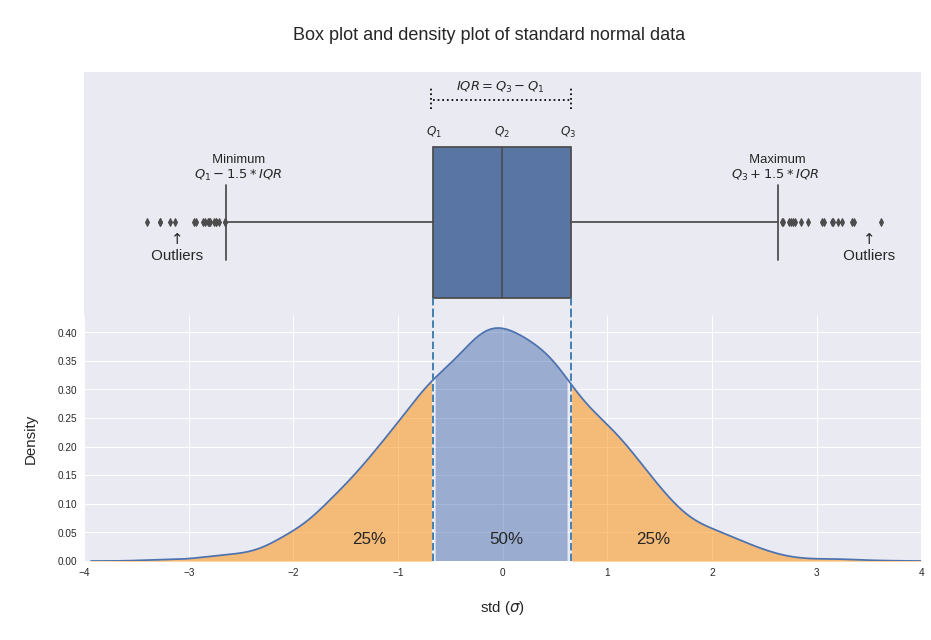

In [19]:
# Let's create the boxplot describing the elements mentioned and the density curve of the data 

Q1 = norm_box.quantile(0.25)
Q2 = norm_box.quantile(0.50)
Q3 = norm_box.quantile(0.75)

fig, (ax_1, ax_2) = plt.subplots(2,1, figsize=(15,9), sharex=True)

# Boxplot
sns.boxplot(data=norm_box, ax=ax_1, orient="h")
ax_1.set_alpha
ax_1.grid(False)
ax_1.set_yticklabels("")
ax_1.set_ylim([-0.5,0.8])

# Q1,Q2,Q3 labels on boxplot
ax_1.text(Q1 - 0.07, 0.46, "$Q_1$", fontsize=12)
ax_1.text(Q2 - 0.08, 0.46, "$Q_2$", fontsize=12)
ax_1.text(Q3 - 0.10, 0.46, "$Q_3$", fontsize=12)

# min, max according to Q1 - 1.5 IQR, Q3 + 1.5 IQR
new_min_IQR = norm_box.quantile(0.25) - 1.5 * (Q3 - Q1) 
new_max_IQR = norm_box.quantile(0.75) + 1.5 * (Q3 - Q1)

ax_1.text(new_min_IQR - 0.30, 0.23, "     Minimum\n$Q_1 - 1.5 * IQR$", fontsize=13)
ax_1.text(new_max_IQR - 0.45, 0.23, "     Maximum\n$Q_3 + 1.5 * IQR$", fontsize=13)

# Outliers
ax_1.text(max(norm_box) -0.4, -0.2, "     $\\uparrow$ \n Outliers", fontsize=15)
ax_1.text(min(norm_box), -0.2, "     $\\uparrow$ \n Outliers", fontsize=15)

# IQR of boxplot
X,Y = [norm_box.quantile(0.25), norm_box.quantile(0.75)], [0.65, 0.65]
ax_1.plot(X, Y, color="black", linestyle="dotted")
ax_1.text(-0.45, 0.70, "$IQR = Q_3 - Q_1$", fontsize=13)

# Dotted lines of boxplot IQR
cap_left = [[X[0] - 0.02, X[0] - 0.02], [0.6,0.72]]
cap_right= [[X[1], X[1]], [0.6,0.72]]

ax_1.plot(cap_left[0],  cap_left[1],  linestyle="dotted", c="black")
ax_1.plot(cap_right[0], cap_right[1], linestyle="dotted", c="black")

# Dashed lines of boxplot (Q1, Q3) to merge with density plots
Y = [-0.5, -0.4]
ax_1.plot([Q1, Q1] ,Y, linestyle="--", linewidth=2, color="steelblue")
ax_1.plot([Q3, Q3] ,Y, linestyle="--", linewidth=2, color="steelblue")

# Density plot
sns.kdeplot(data=norm_box, ax=ax_2)
ax_2.set_ylabel("\nDensity\n", fontdict={"size":15})
ax_2.set_xlabel("\nstd ($\sigma$)\n", fontdict={"size":15})

# Dashed lines of Q1 and Q3
ax_2.axvline(Q1, linestyle="--", linewidth=2, color="steelblue")
ax_2.axvline(Q3, linestyle="--", linewidth=2, color="steelblue")

# Filling area under curve using IQR and values < Q1 and > Q3
X_density, Y_density = ax_2.get_lines()[0].get_data()
IQR_mask = (X_density >= Q1) & (X_density <= Q3)
ax_2.fill_between(X_density[IQR_mask], Y_density[IQR_mask], alpha=0.5)

lower_Q1_mask = X_density <= Q1
greater_Q3_mask = X_density >= Q3

ax_2.fill_between(X_density[lower_Q1_mask], Y_density[lower_Q1_mask], alpha=0.5, color="darkorange")
ax_2.fill_between(X_density[greater_Q3_mask], Y_density[greater_Q3_mask], alpha=0.5, color="darkorange")

# Values inside density plot
ax_2.text(norm_box.quantile(0.07), 0.03, "25%", fontsize=17)
ax_2.text(norm_box.quantile(0.45), 0.03, "50%", fontsize=17)
ax_2.text(norm_box.quantile(0.90), 0.03, "25%", fontsize=17)

# Limits x-axis boxplot and kde plot
ax_1.set_xlim([-4, 4])
ax_2.set_xlim([-4, 4])

plt.subplots_adjust(hspace=0)
plt.suptitle("\nBox plot and density plot of standard normal data\n", fontsize=18)
plt.show()

### Covariance y Coefficient of variations

Covariance is a metric of the variability of two variables. It is not easy to interpreter by itself because is highly affected by the scale of the data, independently of the distribution of it. 

Positive covariance values indicate a positive relation, negative values a negative relation, and a covariance of 0 means no relation. It's worth to note that the covariance does not indicate the strength of the relation between the two variables as the steep of the slop. It only indicates if the slope is positive o negative. Covariance is calculated as:

$$
Cov_{x,y} = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{N - 1}
$$

However, the covariance is useful to get other kinds of metrics, for example, It's used in principal component analysis (PCA) for dimensional reduction or clustering and, most importantly in our case, to calculate Pearson correlation for continues data.

Pearson's correlation range from -1 to 1 and It's a way  of measurement a linear correlation between two variables. A value of -1 indicates a strong negative linear relation between the variables and 1 a strong positive linear relation. Pearson's correlation of 0 indicates no relation

$$
Pearson\ Correlation = \frac{Cov_{x,y}}{\sqrt{Var_x} \sqrt{Var_y}} = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum(x_i - \overline{x})^2 \sum(y_i - \overline{y})^2}}
$$

On the other hand, a different way of measuaring the correlation of variables is Spearman's rank correlation coefficient. Spearman differs from Perason mainly in two aspects. Spearman can be used for ordinal data (and continous data) and also measures correlation for monotonic functions, not being limited to linear relationships only.

$$
Spearman\ correlation = \rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} \\
d_{i} = difference\ between\ the\ two\ ranks\ of\ each\ observation \\
n = number\ of\ observations
$$


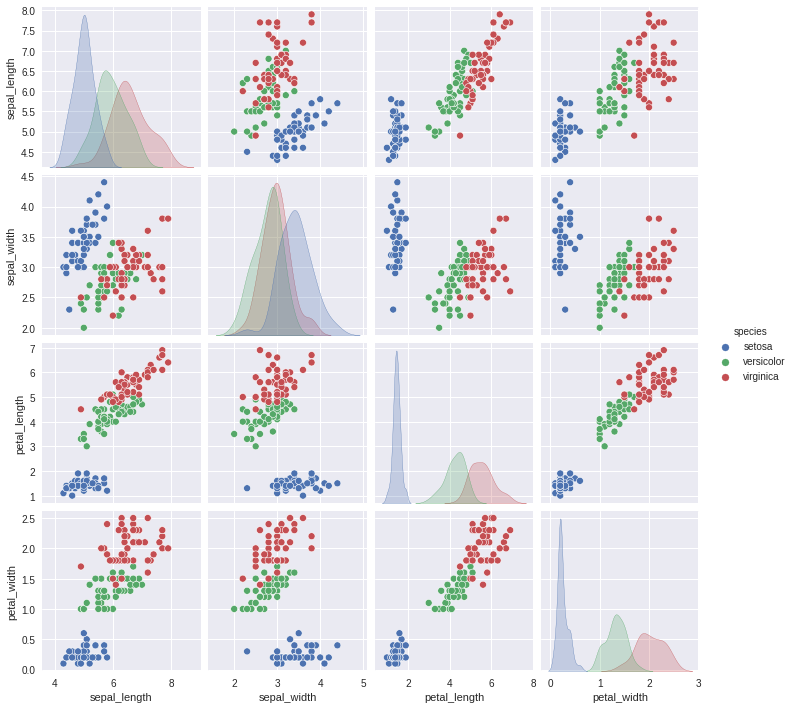

In [20]:
# Lets plot all the columns using iris and group by species
sns.pairplot(data=iris_df, hue="species")
plt.show()

In [21]:
# From the previous plot We can see a strong relation among some variables, specially linear relation,
# for examples petal_length and petal_width lets calculate Pearson's correlation in a semi-manually method and
# a direct method

petal_data = iris_df[["petal_width","petal_length"]]

# Semi
Cov_x_y_num = (petal_data.petal_width - petal_data.petal_width.mean()) * (petal_data.petal_length - petal_data.petal_length.mean())
Cov_x_y_den = petal_data.shape[0] - 1
Cov_x_y = Cov_x_y_num.sum() / Cov_x_y_den
Var_x = ((petal_data.petal_width - petal_data.petal_width.mean())**2).sum() / (petal_data.shape[0] - 1)
Var_y = ((petal_data.petal_length - petal_data.petal_length.mean())**2).sum() / (petal_data.shape[0] - 1)

Pearson_manually = Cov_x_y / (Var_x**(1/2) * Var_y**(1/2))

# Direct
Pearson_direct = petal_data.corr()

In [22]:
# Both methods gave almost the same result, the only difference is that using the method corr() also compares
# a column with itself, which gives us pearson's correlation value of 1. Anyway, a strong 0.96 pearson's value is 
# obtained

print("Manual method:",Pearson_manually, "\n")
print("Direct Method:\n", Pearson_direct)

Manual method: 0.9628654314027959 

Direct Method:
               petal_width  petal_length
petal_width      1.000000      0.962865
petal_length     0.962865      1.000000


In [23]:
# Similarly, spearman correlation can be obtained using the method corr(), but in this case, spearman is most
# suitable in data that looks like this (non linear monotonic functions)

# x increases and y too
x = np.arange(1, 20, 0.5)
y_log = np.log(x)

# y decreases
y_exp = -5**x 

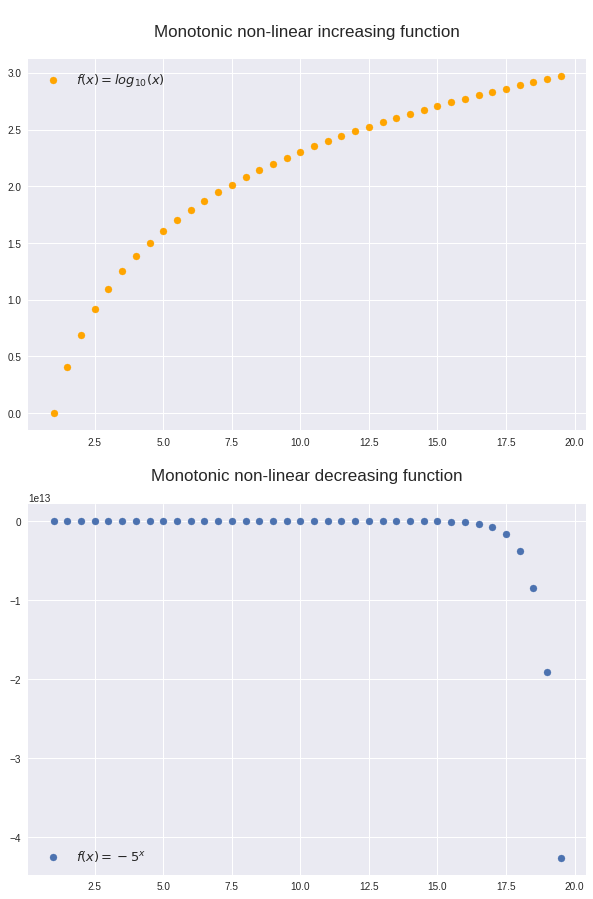

In [24]:
fig, ax = plt.subplots(2,1, figsize=(10,15))
ax[0].scatter(x, y_log, label="$f(x) = log_{10}(x)$", color="orange")
ax[0].set_title("\nMonotonic non-linear increasing function\n", fontdict={"size":17})
ax[0].legend(fontsize=13)

ax[1].scatter(x, y_exp, label="$f(x) = -5^x$")
ax[1].set_title("\nMonotonic non-linear decreasing function\n", fontdict={"size":17})
ax[1].legend(fontsize=13)
plt.show()

In [25]:
# Lets calculate spearman and pearson correlation using the data shown above

data_log = pd.DataFrame([x, y_log], index=["X","Y_log"]).T
data_exp = pd.DataFrame([x, y_exp], index=["X","Y_exp"]).T

print("Pearson's correlation using log function:\n", data_log.corr())
print("")
print("Spearman's correlation using log function:\n", data_log.corr("spearman"))

Pearson's correlation using log function:
               X     Y_log
X      1.000000  0.938196
Y_log  0.938196  1.000000

Spearman's correlation using log function:
          X  Y_log
X      1.0    1.0
Y_log  1.0    1.0


In [26]:
# We do know a strong relation exists between X y Y_log because Y_log came from log(x).
# Values near one are obtained using pearson. What about our exp function

print("Pearson's correlation using exp function:\n", data_exp.corr())
print("")
print("Spearman's correlation using exp function:\n", data_exp.corr("spearman"))

# You will see pearson fails to retrieve the relation between X and Y_exp but, that is not the case
# using Spearman

Pearson's correlation using exp function:
              X    Y_exp
X      1.00000 -0.43884
Y_exp -0.43884  1.00000

Spearman's correlation using exp function:
          X  Y_exp
X      1.0   -1.0
Y_exp -1.0    1.0


### Asymmetry and Kurtosis

Asymmetric distributions refer in which the values of the data occur at different frequencies turning out with a mean, median and mode at different points (unlike normal distribution).

Asymmetry is also known as skewness. Two types of skweness can be found depending of the direction of the tail (see below): positive (or right) and negative (or left).

Skewness can be determined visually but, coefficients have been described to determine the behavior of the tail. One of them, it's the Fisher coefficient of skewness:

$$
\gamma_1 = \frac{\mu_3}{\sigma^3} \\
\mu_3 = third\ central\ moment = \frac{1}{n} \sum_{i=1}^{n}(x_i - \overline{x})^3\ \ \ \ \ \ \ \ \overline{x} = mean
$$

Values of $\gamma > 0$ indicate positive asymetric distribution, $\gamma = 0$ symetric distribution and $\gamma < 0$ a negative tail.
 
On the other hand, Kurtosis is a statistical measure used to describe the distribution of observed data around the mean. In other words, kurtosis describes if the data is either clustering around the mean or not. __Remember this is only valid for unimodal (there is a clear unique peak) continuous distributions.__

$$
k = \frac{\mu_4}{\sigma^4} \\
\mu_4 = fourth\ central\ moment = \frac{1}{n}\sum_{i=1}^{n}(x_i - \overline{x})^4\ \ \ \ \ \ \ \ \overline{x} = mean
$$

It's also common to use _excess kurtosis_, which is just $k - 3$. Thus, values of _excess kurtosis_ (lets just say here $k_e$) of $k_e > 0$ indicate a Leptokurtic curve (figure below),  $k_e = 0$ a Mesokurtic curve and $k_e < 0$ is named Platykurtic

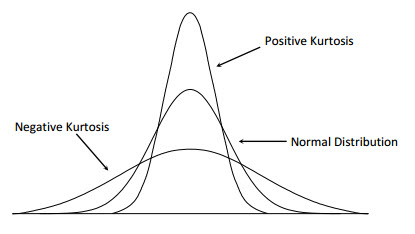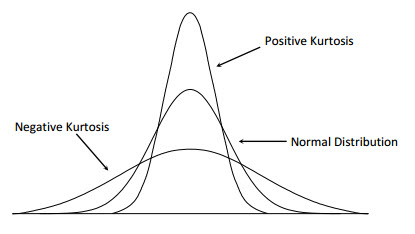

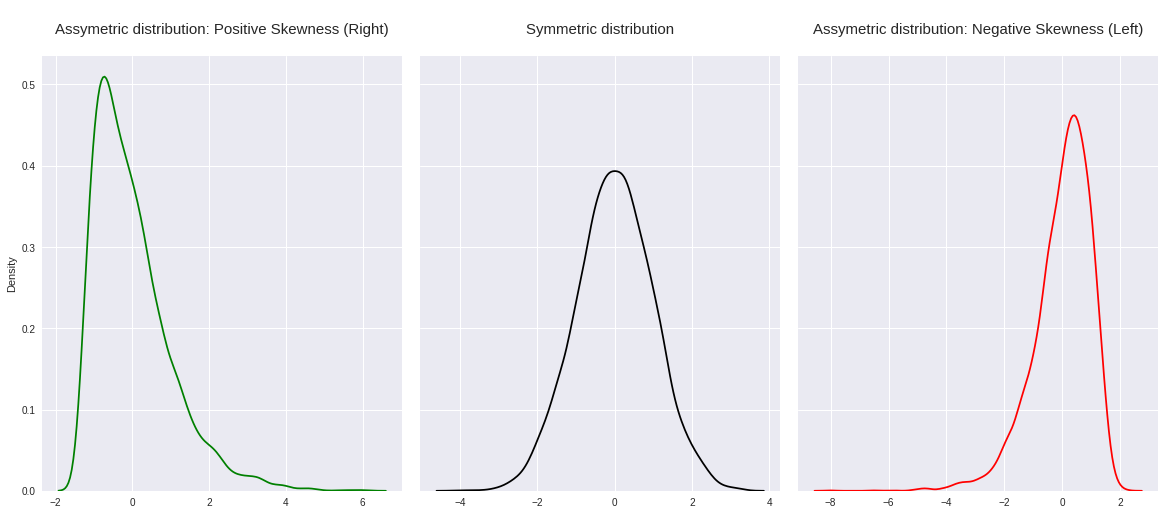

In [27]:
# Lets create some asymmetric (positive and negative) distributions and create the plots

# Right tail/skewness (positive) gamma
X_pos = np.random.gamma(2, 5, size=5000)
X_pos = StandardScaler().fit_transform(X_pos.reshape(-1,1)).reshape(-1,)

# Left tail/skewness (negative) weibull
X_neg = np.random.weibull(5000, 5000)
X_neg = StandardScaler().fit_transform(X_neg.reshape(-1,1)).reshape(-1,)

# Normal distribution
X_nom = np.random.normal(0, 1, 5000)
X_nom = StandardScaler().fit_transform(X_nom.reshape(-1,1)).reshape(-1,)

# Plots
fig, axis = plt.subplots(1,3, figsize=(20, 8), sharey=True)

sns.kdeplot(X_pos, c="green", ax=axis[0])
axis[0].set_title("\nAssymetric distribution: Positive Skewness (Right)\n", fontsize=15)

sns.kdeplot(X_nom, c="black", ax=axis[1])
axis[1].set_title("\nSymmetric distribution\n", fontsize=15)

sns.kdeplot(X_neg, c="red", ax=axis[2])
axis[2].set_title("\nAssymetric distribution: Negative Skewness (Left)\n", fontsize=15)

plt.subplots_adjust(wspace=0.05)
plt.show()

In [28]:
# To calculate the skeweness y (gamma) and determine the type of distribution,
# we can use stats.skew or even pd.DataFrame().skew()

def PrintTypeSkewness(y:float):
    
    '''
    Show on screen the type of asymmetry 
    
    This function takes the skew value (It's only considered the integer part and one decimal) and
    print on screen if the data distribution of the data is symmetric or asymmetric (positive or negative)
    
    Parameter
    ---------
    
    y: float
        gamma value of the skewness of the distribution  
    
    Examples
    --------
    
    >>>from scipy.stats import skew
    >>>from numpy.random import normal
    >>>X = normal(size=10000)
    >>>skewness = skew(X)
    >>>PrintTypeSkewness(skewness)
    y=0.0; Your data is symmetric!
    
    '''
    
    l = str(y).split(".")
    y = float(l[0] + "." + l[1][0])
    
    if y == 0:
        print(f"y={y}; Your data is symmetric!")
    elif y > 0:
        print(f"y={y}; Your data is positive (tail to the right) assymetric!")
    else:
        print(f"y={y}; Your data is negative (tail to the left) assymetric!")


print("\tVariable X_pos:")
PrintTypeSkewness(stats.skew(X_pos))
print("")

print("\tVariable X_nom:")
PrintTypeSkewness(stats.skew(X_nom))
print("")

print("\tVariable X_neg:")
PrintTypeSkewness(stats.skew(X_neg))
print("")

	Variable X_pos:
y=1.3; Your data is positive (tail to the right) assymetric!

	Variable X_nom:
y=-0.0; Your data is symmetric!

	Variable X_neg:
y=-1.2; Your data is negative (tail to the left) assymetric!



In [29]:
# Now let's explore kurtosis and Leptokurtic, Mesokurtic and Platykurtic curves in iris data-set per specie

# Separating by species
setosa = iris_df[iris_df["species"] == "setosa"].drop("species", axis=1)
versicolor = iris_df[iris_df["species"] == "versicolor"].drop("species", axis=1)
virginica = iris_df[iris_df["species"] == "virginica"].drop("species", axis=1)

In [30]:
# Filtering only normal columns

# Get only normal data
def GetNormal(DataFrame:pd.DataFrame) -> pd.DataFrame:
    k2, p = stats.normaltest(DataFrame)
    return DataFrame.iloc[:, p > 0.05]

print(iris_df.species.unique())

setosa = GetNormal(setosa)
versicolor = GetNormal(versicolor)
virginica = GetNormal(virginica)

['setosa' 'versicolor' 'virginica']


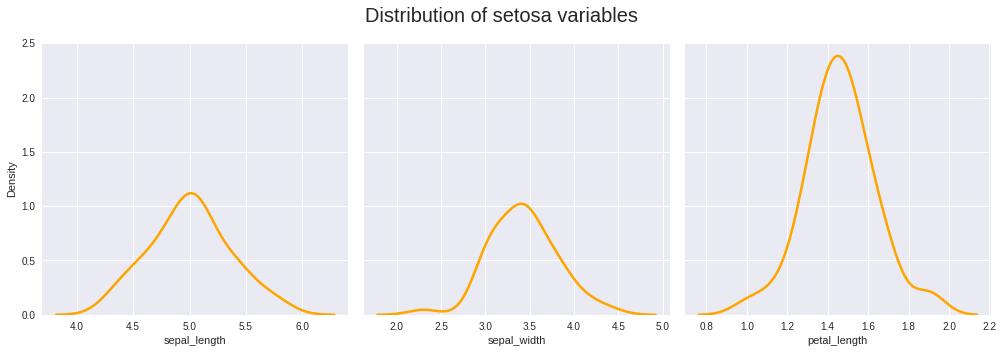

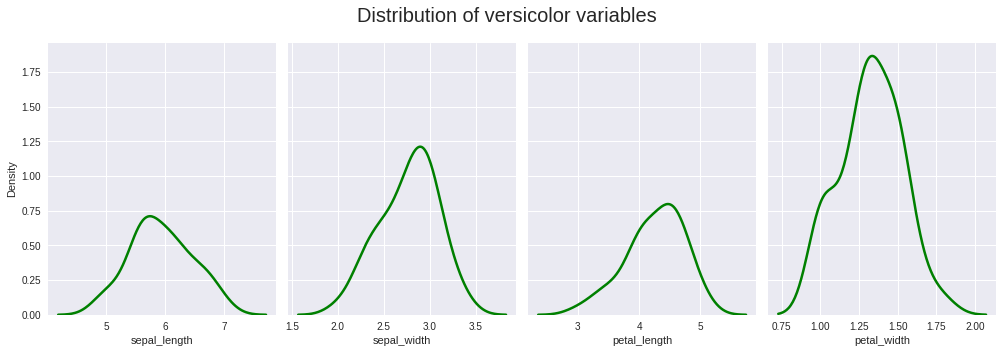

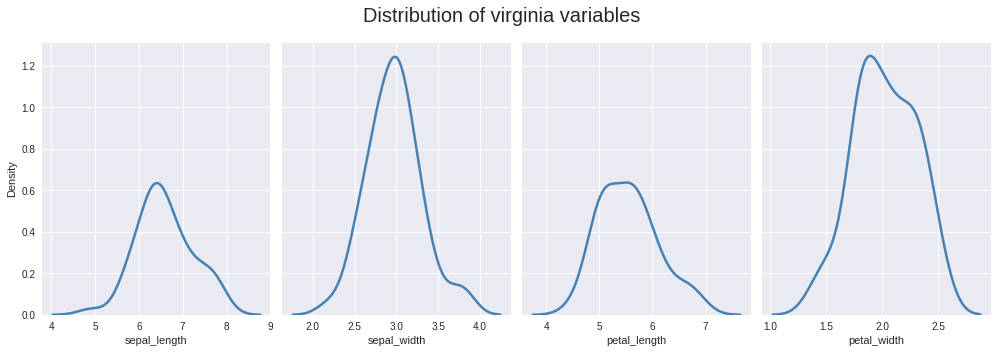

In [31]:
# Plotting distributions per species and variable
def PlotColumnsIris(DataFrame:pd.DataFrame, title="", **keywords):

    df = DataFrame
    fig, axis = plt.subplots(1, df.shape[1] , figsize=(17,5), sharey=True)

    for column, plot in zip(df, axis):
        sns.kdeplot(df[column], ax=plot, **keywords)
    
    plt.suptitle(title, fontsize=20)
    plt.subplots_adjust(wspace=0.05)

PlotColumnsIris(setosa, "Distribution of setosa variables\n", **{"linewidth":2.5, "color":"orange"})
PlotColumnsIris(versicolor, "Distribution of versicolor variables\n", **{"linewidth":2.5, "color":"green"})
PlotColumnsIris(virginica, "Distribution of virginia variables\n", **{"linewidth":2.5, "color":"steelblue"})
plt.show()

In [32]:
# Lets calculate kurtosis of the species. kurt() uses the Fisher's definition k-3
# Remember that
#k > 0 Leptokurtic curve
#k = 0 Mesokurtic curve
#k < 0 Platykurtic curve

# Now the kurtosis of setosa
setosa.kurt()

sepal_length   -0.252689
sepal_width     0.954703
petal_length    1.021576
dtype: float64

In [33]:
# Now the kurtosis of virginica
virginica.kurt()

sepal_length    0.032904
sepal_width     0.706071
petal_length   -0.153779
petal_width    -0.602264
dtype: float64

In [34]:
# Now the kurtosis of versicolor
versicolor.kurt()

sepal_length   -0.533010
sepal_width    -0.366237
petal_length    0.047903
petal_width    -0.410059
dtype: float64

### Standard error

The Standard error shows the variability between the means of the different samples we extracted. It tells how the data is distributed and also, this error decreases as the sample size increases.

If we take random samples from a population and calculate the means of them. Each sample will probably return different means. Using each of them as data points a standard deviation can be calculated. This new standard deviation is now called the standard error of the mean, or just standard deviation. Instead of using the mean, We could also take, for example, the standard deviation to obtain the standard error of the standard devitiation and so on.

$$
SE = \frac{\sigma}{\sqrt{n}}\ \ \ \ \ \ \ \ \ \ \sigma=std\ \ n=sample\ size
$$

In [224]:
sepal_length = iris_df.sepal_length

means = []
for i in range(1000000):
    sample = np.random.choice(sepal_length, 50, replace=True)
    means.append(sample.mean())

In [225]:
np.array(means).mean()

5.843280826000001

In [221]:
sepal_length.mean()

5.843333333333335

In [151]:
end = time() - start
print(f"This notebook ran in {end} sec.")

This notebook ran in 6054.600579738617 sec.
